In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [608]:
pd.set_option("display.float_format",lambda x : "{:.3f}".format(x))
np.set_printoptions(suppress=True)

1. Pandas: pd.set_option("display.float_format", lambda x: "{:.sf}".format(x))
This line sets a global formatting option for displaying floating-point numbers in Pandas DataFrames or Series.

Key Parts:
pd.set_option: A method to set various display options in Pandas.
"display.float_format": This specific option controls how floating-point numbers are displayed.
lambda x: "{:.sf}".format(x): A lambda function used to define a custom format for floating-point numbers. The part {:.sf} is a placeholder that formats the number with a specified number of significant figures (sf).

2. NumPy: np.set_printoptions(suppress=True)
This line configures the way NumPy prints arrays, specifically for floating-point numbers.

Key Parts:
np.set_printoptions: A method to control printing options for NumPy arrays.
suppress=True: Prevents scientific notation for small floating-point numbers. When set to True, numbers like 1.23e-05 will be displayed in standard decimal format (e.g., 0.0000123).

In [295]:
df_customers=pd.read_csv("customers.csv")
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [296]:
df_loan=pd.read_csv("loans.csv")
df_loan.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [297]:
df_bureau=pd.read_csv("bureau_data.csv")
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [298]:
#merging all the dataset

df=pd.merge(df_customers,df_loan,on="cust_id")
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [299]:
df=pd.merge(df,df_bureau,on="cust_id")
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [301]:
df.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'default',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio'],
      dtype='object')

In [302]:
df.default.value_counts()

default
False    45703
True      4297
Name: count, dtype: int64

In [303]:
df["default"]=df["default"].astype(int)

In [304]:
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [305]:
X=df.drop("default",axis=1)
y=df["default"]

In [306]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=20)

df_train=pd.concat([xtrain,ytrain],axis=1)
df_test=pd.concat([xtest,ytest],axis=1)


In [307]:
df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
48911,C48912,46,F,Single,Self-Employed,2755000,0,Owned,29,Kolkata,...,2024-06-12,2024-06-15,3,0,108,10,64,8,46,0
12499,C12500,28,M,Single,Salaried,547000,1,Rented,7,Hyderabad,...,2020-10-22,2020-10-28,4,1,177,0,0,4,0,0
32648,C32649,36,F,Married,Self-Employed,2123000,2,Mortgage,26,Mumbai,...,2022-10-28,2022-11-19,4,0,165,10,66,6,58,1
11636,C11637,39,F,Married,Self-Employed,193000,3,Owned,9,Hyderabad,...,2020-09-21,2020-10-19,3,2,26,6,36,6,57,0
45985,C45986,20,F,Married,Self-Employed,473000,2,Owned,24,Delhi,...,2024-02-27,2024-03-11,3,0,90,18,89,5,65,0


In [308]:
df_test.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
18991,C18992,56,M,Married,Self-Employed,1132000,2,Owned,1,Jaipur,...,2021-06-16,2021-07-13,2,2,70,0,0,4,27,0
41632,C41633,40,M,Single,Salaried,618000,0,Rented,3,Jaipur,...,2023-09-21,2023-10-11,2,2,65,10,49,4,38,0
36306,C36307,40,M,Married,Self-Employed,1732000,4,Mortgage,28,Delhi,...,2023-03-10,2023-04-04,3,2,131,2,19,5,82,1
26881,C26882,29,M,Single,Salaried,2074000,2,Owned,14,Lucknow,...,2022-03-31,2022-04-23,1,2,25,7,39,6,52,0
3469,C03470,37,M,Married,Self-Employed,364000,4,Mortgage,11,Delhi,...,2019-11-28,2019-12-24,4,0,147,4,22,8,37,0


In [309]:
df_train.shape

(37500, 33)

In [310]:
df_test.shape

(12500, 33)

In [311]:
#check null values in train dataset

In [312]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 49
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [313]:
df_train.residence_type.unique()

array(['Owned', 'Rented', 'Mortgage', nan], dtype=object)

In [314]:
df_train.residence_type.value_counts()

residence_type
Owned       21198
Mortgage     8831
Rented       7422
Name: count, dtype: int64

In [315]:
mode_residence=df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [316]:
import warnings
warnings.filterwarnings("ignore")

In [317]:
df_train["residence_type"].fillna(mode_residence,inplace=True)

In [318]:
df_train.isnull().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [319]:
#check for test dataset

df_test.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 13
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [320]:
mode_residence=df_test["residence_type"].mode()[0]
mode_residence

'Owned'

In [321]:
df_test["residence_type"]=df_test["residence_type"].replace(np.nan,mode_residence)
df_test["residence_type"].isnull().sum()


0

In [322]:
#check for duplicates


#train_data

df_train.duplicated().sum()

#test data
df_test.duplicated().sum()

0

In [323]:
#box plot

df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [324]:

columns_continous=['age', 'income', 'number_of_dependants', 'years_at_current_address',
        'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']
columns_continous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

In [325]:

columns_categorical=['gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_purpose',
       'loan_type','default']
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type',
 'default']

In [326]:
#xtrain


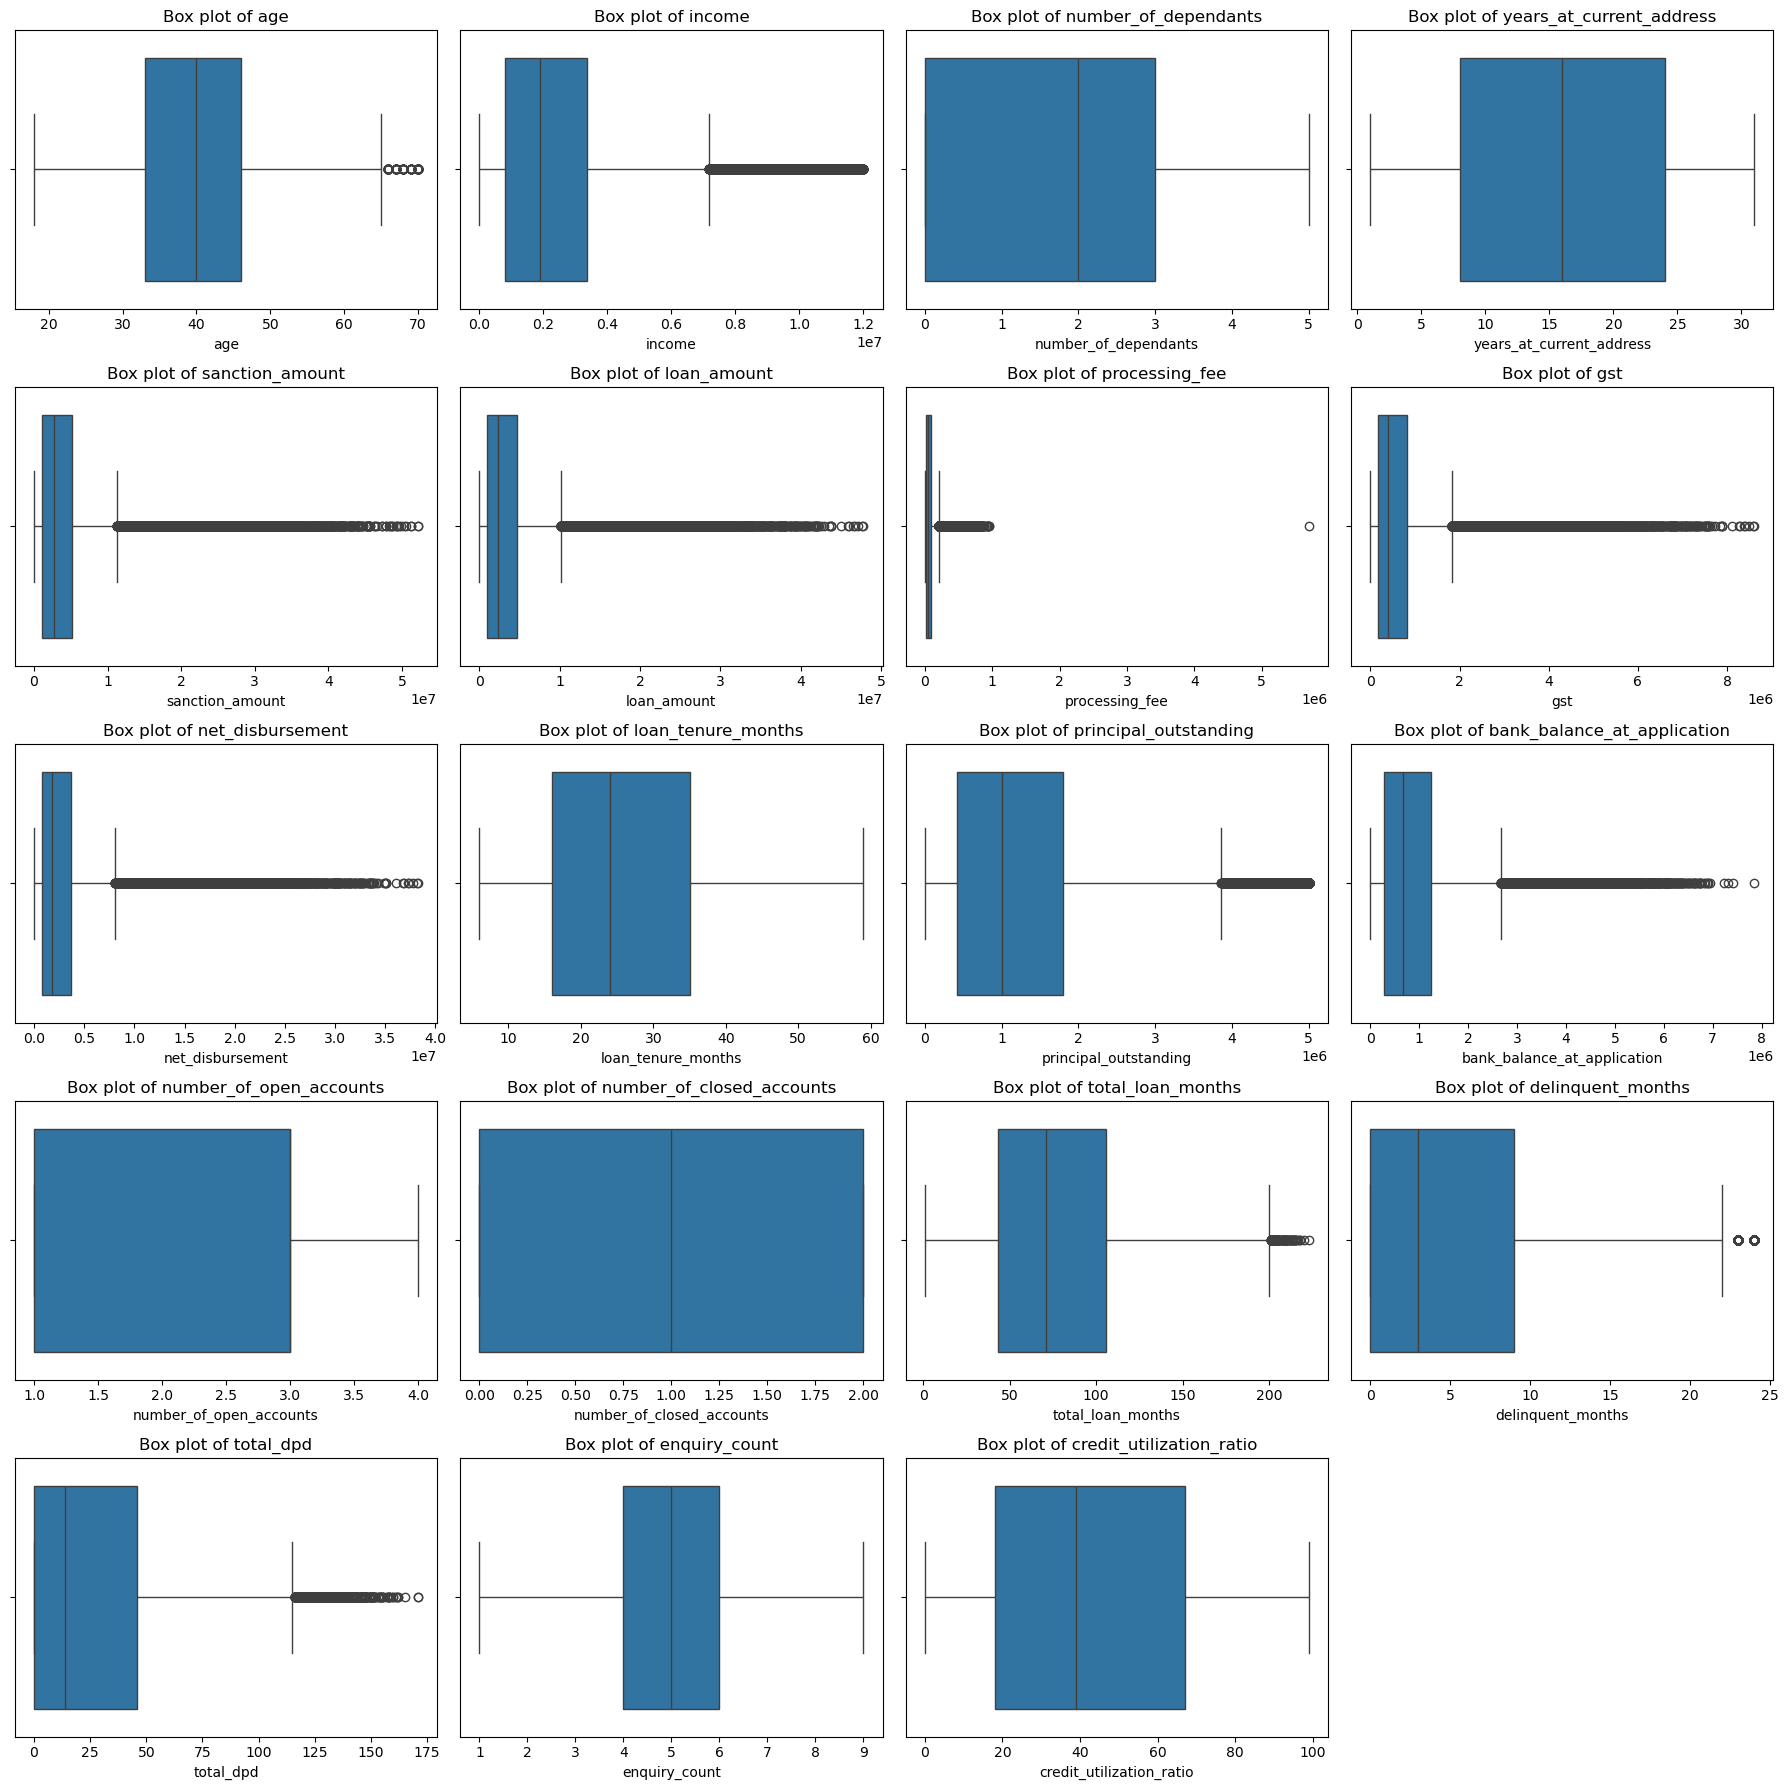

In [327]:
length=len(columns_continous)
ncols=4
nrows=len(columns_continous)/ncols
nrows=round(nrows)
nrows

fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(18,18))

axes=axes.flatten()


for index,cols in zip(axes,columns_continous):
    sns.boxplot(data=df_train,x=cols,ax=index)
    index.set_title(f"Box plot of {cols}")
    index.set_xlabel(f"{cols}")

# Turn off unused subplots
for ax in axes[length:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

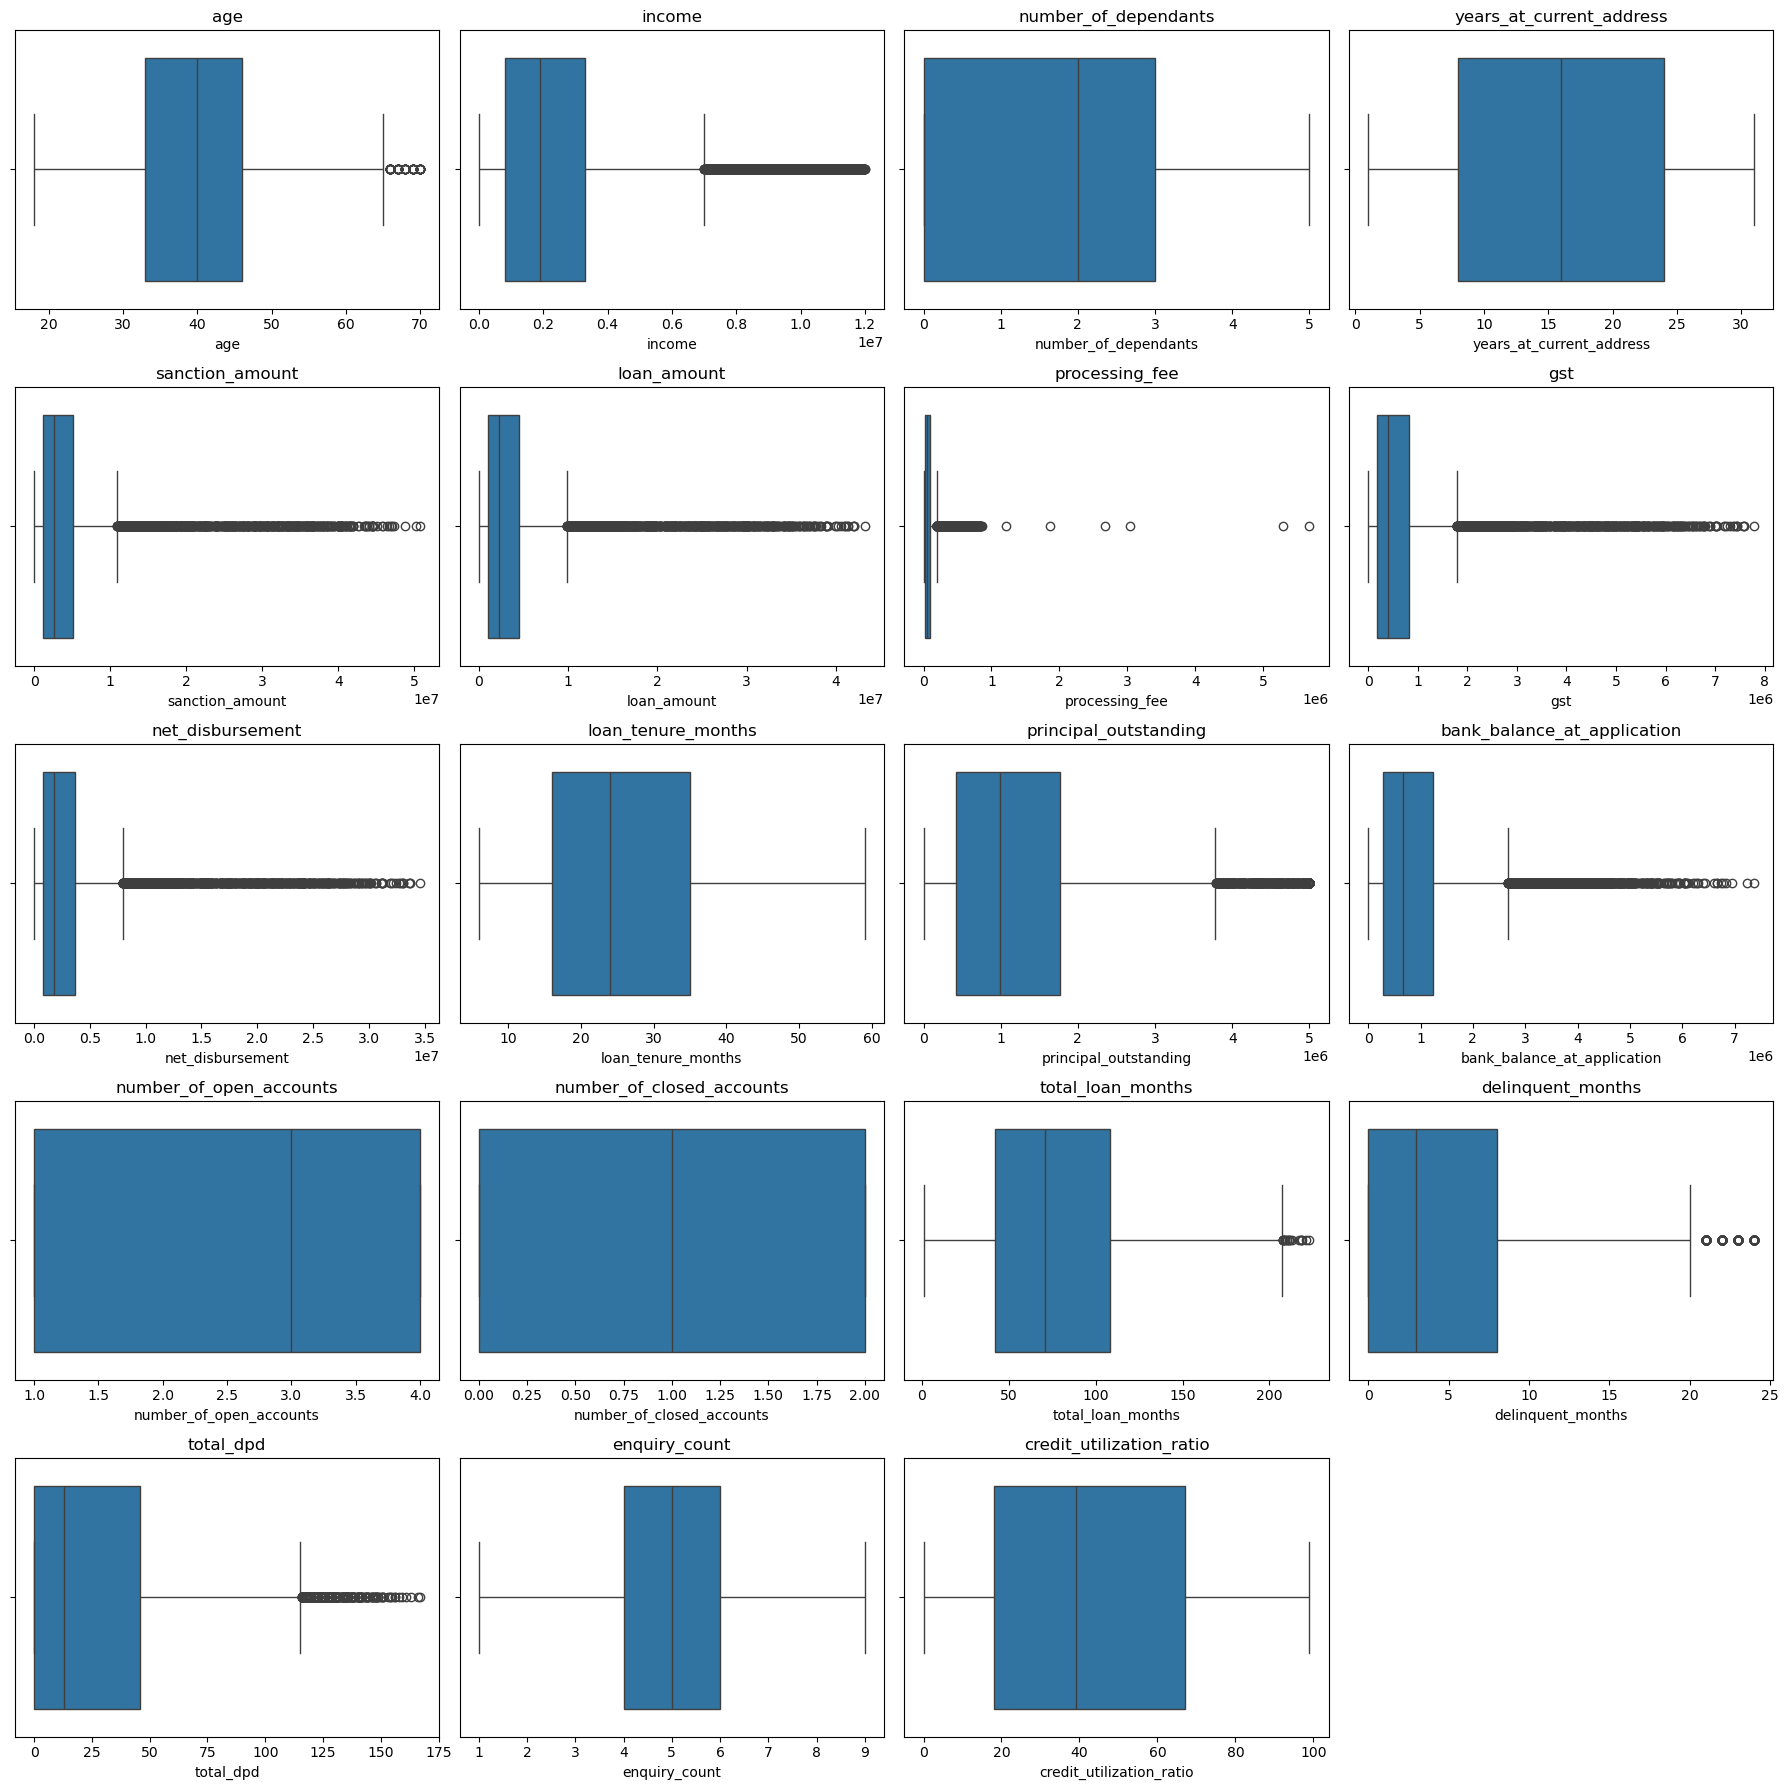

In [328]:
# xtest

numplot=len(columns_continous)
ncols=4
nrows=(numplot+ncols-1)//ncols
nrows


fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(18,18))

axes=axes.flatten()


for i,cols in enumerate(columns_continous):
    sns.boxplot(data=df_test,x=cols,ax=axes[i])
    axes[i].set_title(cols)

for j in range(i+1,nrows*ncols):
    axes[j].axis("off")


plt.tight_layout()
plt.show()

In [329]:
#train data

In [330]:
df_train.processing_fee.describe()

count     37500.00
mean      80187.46
std      110988.72
min           0.00
25%       19280.00
50%       44920.00
75%       92560.00
max     5698029.90
Name: processing_fee, dtype: float64

In [331]:
df_train[df_train.processing_fee==df_train.processing_fee.max()][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
12294,4639000,5698029.90


In [332]:
# let's check if the loan amount is less than the processing fee

df_train[df_train.processing_fee > df_train.loan_amount][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
12294,4639000,5698029.90


In [333]:
df_train[(df_train.processing_fee / df_train.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
12294,4639000,5698029.90


In [334]:
df_train_1=df_train[(df_train.processing_fee / df_train.loan_amount)<0.03].copy()
df_train_1

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
48911,C48912,46,F,Single,Self-Employed,2755000,0,Owned,29,Kolkata,...,2024-06-12,2024-06-15,3,0,108,10,64,8,46,0
12499,C12500,28,M,Single,Salaried,547000,1,Rented,7,Hyderabad,...,2020-10-22,2020-10-28,4,1,177,0,0,4,0,0
32648,C32649,36,F,Married,Self-Employed,2123000,2,Mortgage,26,Mumbai,...,2022-10-28,2022-11-19,4,0,165,10,66,6,58,1
11636,C11637,39,F,Married,Self-Employed,193000,3,Owned,9,Hyderabad,...,2020-09-21,2020-10-19,3,2,26,6,36,6,57,0
45985,C45986,20,F,Married,Self-Employed,473000,2,Owned,24,Delhi,...,2024-02-27,2024-03-11,3,0,90,18,89,5,65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23452,C23453,38,F,Married,Self-Employed,3969000,3,Owned,15,Lucknow,...,2021-11-26,2021-12-16,2,2,80,0,0,3,14,0
23775,C23776,50,F,Single,Self-Employed,3485000,0,Owned,26,Kolkata,...,2021-12-08,2021-12-31,1,1,57,0,0,2,22,0
37135,C37136,34,F,Married,Salaried,313000,3,Owned,30,Delhi,...,2023-04-10,2023-04-16,4,1,86,12,70,9,36,0
27098,C27099,18,F,Single,Salaried,1253000,1,Owned,16,Bangalore,...,2022-04-08,2022-04-16,3,2,87,0,0,5,3,0


In [335]:
df_train_1[(df_train_1.processing_fee / df_train_1.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee


In [336]:
#test data

In [337]:
df_test[df_test.processing_fee > df_test.loan_amount][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
9898,3626000,5293543.52
28174,966000,1214492.67
29305,2616000,3036378.01
47089,1738000,1858964.77
23981,2234000,2669791.02
33705,3812000,5678020.86


In [338]:
df_test[(df_test.processing_fee / df_test.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
9898,3626000,5293543.52
28174,966000,1214492.67
29305,2616000,3036378.01
47089,1738000,1858964.77
23981,2234000,2669791.02
33705,3812000,5678020.86


In [339]:
df_test_1=df_test[(df_test.processing_fee / df_test.loan_amount)<0.03].copy()
df_test_1

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
18991,C18992,56,M,Married,Self-Employed,1132000,2,Owned,1,Jaipur,...,2021-06-16,2021-07-13,2,2,70,0,0,4,27,0
41632,C41633,40,M,Single,Salaried,618000,0,Rented,3,Jaipur,...,2023-09-21,2023-10-11,2,2,65,10,49,4,38,0
36306,C36307,40,M,Married,Self-Employed,1732000,4,Mortgage,28,Delhi,...,2023-03-10,2023-04-04,3,2,131,2,19,5,82,1
26881,C26882,29,M,Single,Salaried,2074000,2,Owned,14,Lucknow,...,2022-03-31,2022-04-23,1,2,25,7,39,6,52,0
3469,C03470,37,M,Married,Self-Employed,364000,4,Mortgage,11,Delhi,...,2019-11-28,2019-12-24,4,0,147,4,22,8,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6597,C06598,33,M,Married,Self-Employed,4250000,2,Mortgage,21,Hyderabad,...,2020-03-21,2020-03-26,4,0,107,0,0,5,53,0
45956,C45957,39,M,Married,Self-Employed,2194000,3,Owned,29,Delhi,...,2024-02-26,2024-03-10,1,0,35,8,37,3,32,0
18876,C18877,34,M,Single,Salaried,2187000,0,Mortgage,26,Mumbai,...,2021-06-12,2021-07-04,4,2,127,3,12,5,1,0
24224,C24225,41,F,Single,Self-Employed,3000000,0,Rented,30,Chennai,...,2021-12-24,2021-12-28,4,1,85,10,48,5,47,0


In [340]:
df_test_1[(df_test_1.processing_fee / df_test_1.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee


In [341]:
#categorical columns

columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type',
 'default']

In [342]:
for i in columns_categorical:
    print(f" {i} : {df_train_1[i].unique()}")
    

 gender : ['F' 'M']
 marital_status : ['Single' 'Married']
 employment_status : ['Self-Employed' 'Salaried']
 residence_type : ['Owned' 'Rented' 'Mortgage']
 city : ['Kolkata' 'Hyderabad' 'Mumbai' 'Delhi' 'Chennai' 'Ahmedabad' 'Pune'
 'Jaipur' 'Bangalore' 'Lucknow']
 state : ['West Bengal' 'Telangana' 'Maharashtra' 'Delhi' 'Tamil Nadu' 'Gujarat'
 'Rajasthan' 'Karnataka' 'Uttar Pradesh']
 loan_purpose : ['Home' 'Personal' 'Auto' 'Education' 'Personaal']
 loan_type : ['Secured' 'Unsecured']
 default : [0 1]


In [343]:
#cleaing loan_purpose column for test and train dataset


In [344]:
df_train_1["loan_purpose"]=df_train_1["loan_purpose"].replace("Personaal","Personal")
df_train_1["loan_purpose"].unique()

array(['Home', 'Personal', 'Auto', 'Education'], dtype=object)

In [345]:
df_test_1["loan_purpose"]=df_test_1["loan_purpose"].replace("Personaal","Personal")
df_test_1["loan_purpose"].unique()

array(['Home', 'Personal', 'Auto', 'Education'], dtype=object)

<h3 align="center" style="color:blue">Exploratory data analysis</h3>

In [347]:
columns_continous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

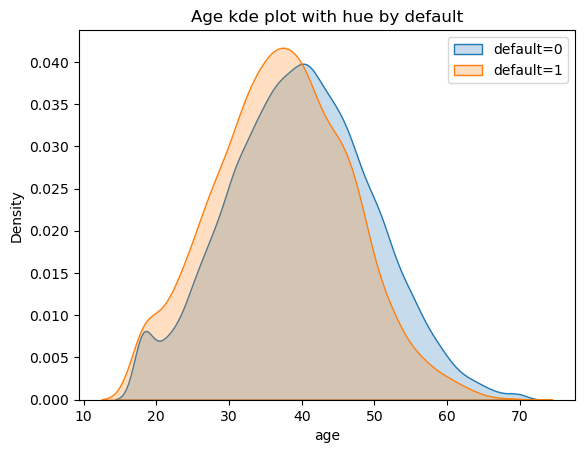

In [348]:
sns.kdeplot(df_train_1[df_train_1.default==0]["age"],fill=True,label="default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]["age"],fill=True,label="default=1")

plt.title(f"Age kde plot with hue by default")
plt.legend()
plt.show()

insights 
1. blue graph is little bit shifted to the right of the blue graph which indicates younger age group is likley to  default

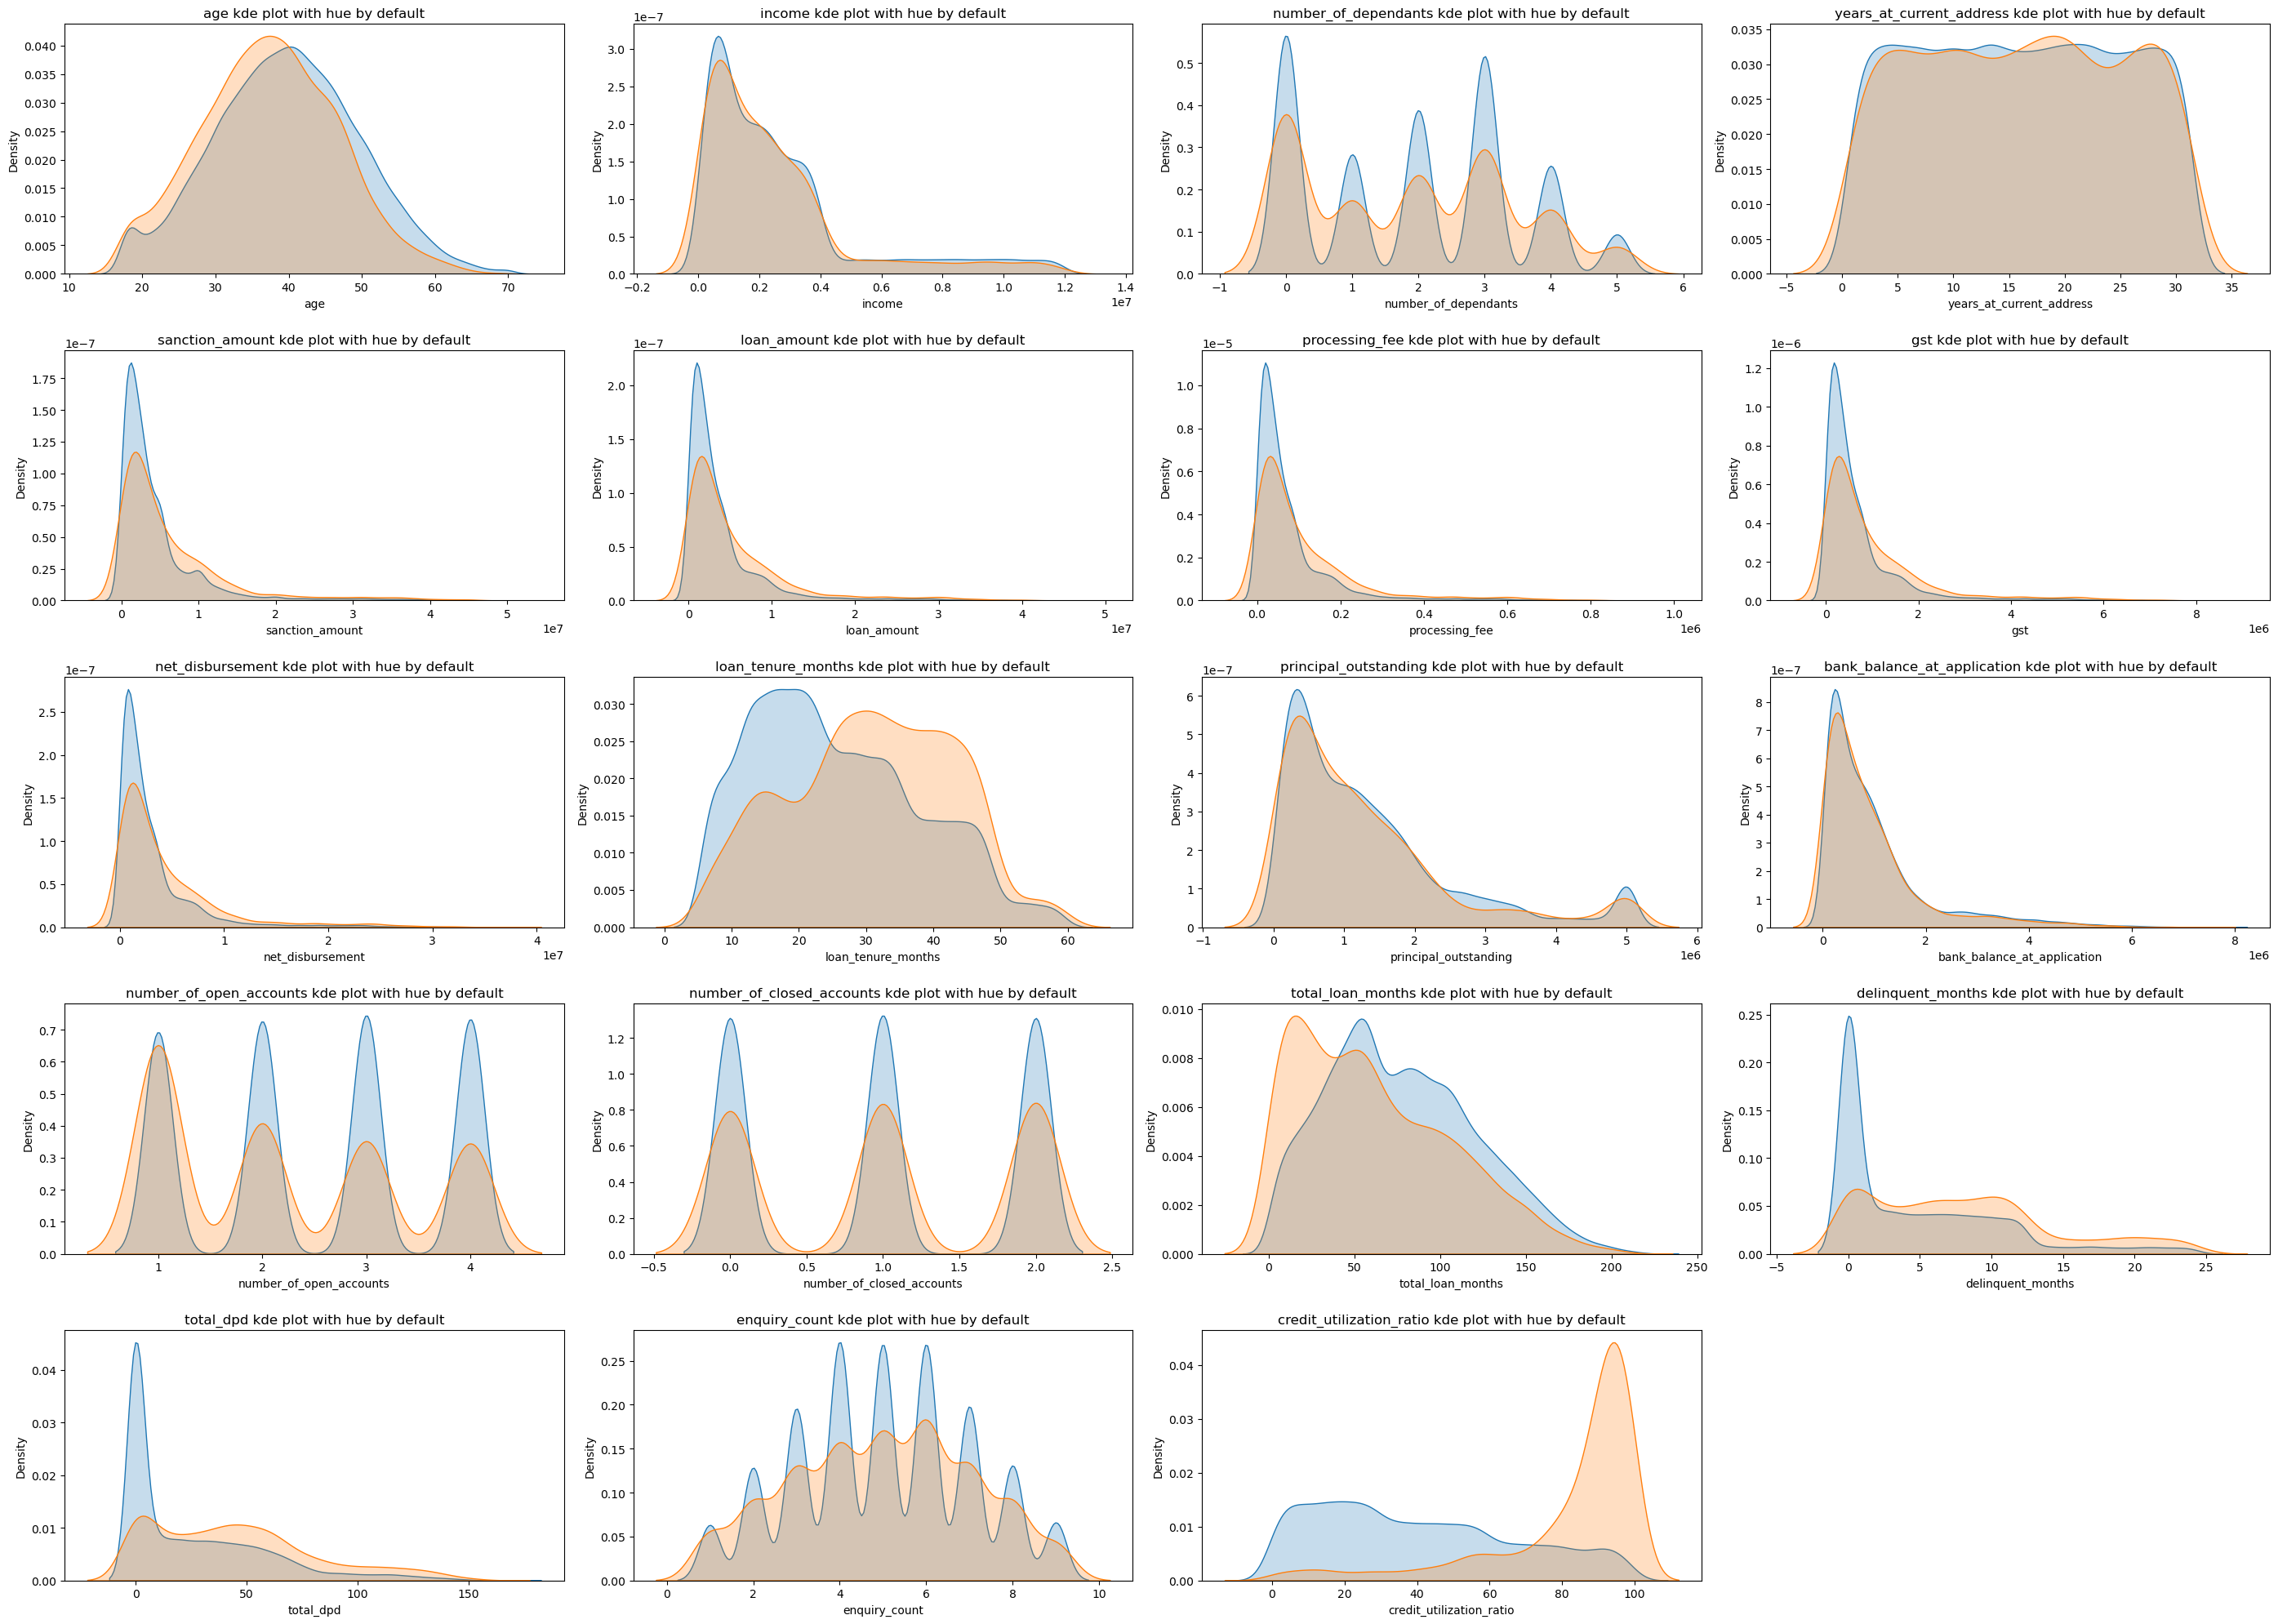

In [350]:
length=len(columns_continous)
ncols=4
nrows=len(columns_continous)/ncols
nrows=round(nrows)
nrows

fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(28,20))

axes=axes.flatten()


for index,cols in zip(axes,columns_continous):
    sns.kdeplot(df_train_1[cols][df_train_1.default==0],fill=True,label="default=0",ax=index)
    sns.kdeplot(df_train_1[cols][df_train_1.default==1],fill=True,label="default=1",ax=index)
    index.set_title(f"{cols} kde plot with hue by default")


# Turn off unused subplots
for ax in axes[length:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

**Insights**

1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
1. In remaining columns the distributions do not give any obvious insights
1. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later

<h3 align="center" style="color:blue"> Feature engineering</h3>

<h4 align="left" style="color:blue"> Loan to income</h4>

In [354]:
df_train_1["loan_to_income"]=df_train_1["loan_amount"]/df_train_1["income"]
df_train_1["loan_to_income"].describe()

count   37493.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.46
max         4.59
Name: loan_to_income, dtype: float64

In [355]:
df_test_1["loan_to_income"]=df_test_1["loan_amount"]/df_test_1["income"]
df_test_1["loan_to_income"].describe()

count   12492.00
mean        1.55
std         0.97
min         0.31
25%         0.77
50%         1.15
75%         2.45
max         4.57
Name: loan_to_income, dtype: float64

In [356]:
df_train_1[["loan_amount","income","loan_to_income"]].sample(10)

,loan_amount,income,loan_to_income
17851,2263000,3209000,0.71
43712,942000,1218000,0.77
20840,1419000,1073000,1.32
42922,20381000,7414000,2.75
45679,9096000,3953000,2.30
23473,1867000,1883000,0.99
28185,4795000,3730000,1.29
24835,786000,632000,1.24
29700,641000,1156000,0.55
10208,34193000,11921000,2.87


In [357]:
df_test_1[["loan_amount","income","loan_to_income"]].sample(10)

,loan_amount,income,loan_to_income
9113,2344000,1415000,1.66
35827,505000,374000,1.35
39392,5245000,3902000,1.34
39581,3950000,6376000,0.62
47694,18429000,7452000,2.47
41976,1785000,592000,3.02
12198,262000,311000,0.84
49196,5984000,2158000,2.77
9151,1421000,2109000,0.67
3287,4409000,2776000,1.59


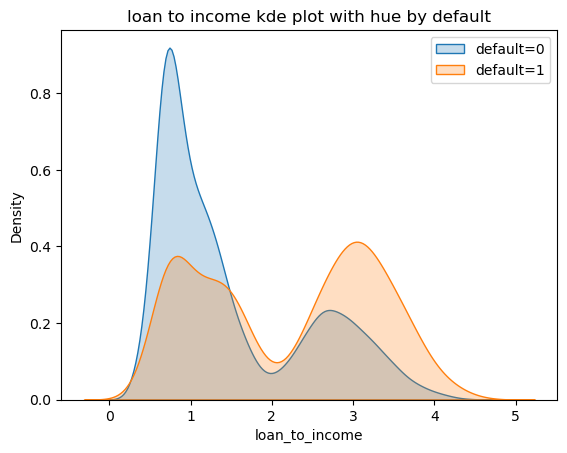

In [358]:
sns.kdeplot(df_train_1[df_train_1.default==0]["loan_to_income"],fill=True,label="default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]["loan_to_income"],fill=True,label="default=1")
plt.title(f"loan to income kde plot with hue by default")
plt.legend()
plt.show()

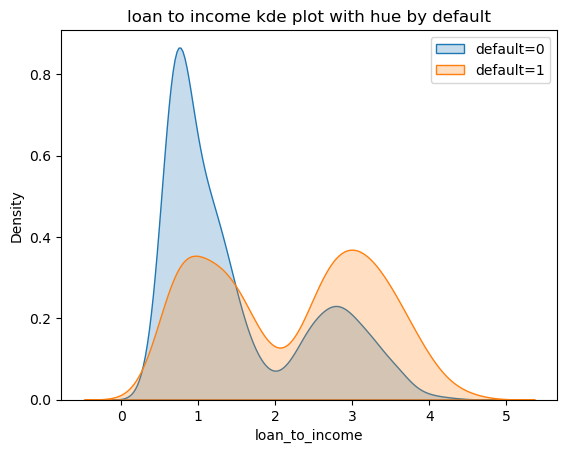

In [359]:
sns.kdeplot(df_test_1[df_test_1.default==0]["loan_to_income"],fill=True,label="default=0")
sns.kdeplot(df_test_1[df_test_1.default==1]["loan_to_income"],fill=True,label="default=1")
plt.title(f"loan to income kde plot with hue by default")
plt.legend()
plt.show()

**Insights**
1. Blue graph has majority of its values on lower side of LTI
2. Orange graph has many values when LTI is higher indicating that higher LTI means high risk loan

<h4 align="left" style="color:blue"> Delinquency Ratio</h4>

In [362]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income'],
      dtype='object')

In [363]:
df_train_1[["delinquent_months","total_loan_months"]].sample(10)

,delinquent_months,total_loan_months
2069,0,52
26902,2,52
24401,0,155
41229,1,144
18060,0,109
42244,9,46
34792,15,78
2202,0,100
4372,3,79
1165,20,42


In [364]:
df_train_1["delinquency_ratio"]=(df_train_1["delinquent_months"]*100/df_train_1["total_loan_months"]).round(1)
df_train_1[["delinquent_months","total_loan_months","delinquency_ratio"]].head(3)

,delinquent_months,total_loan_months,delinquency_ratio
48911,10,108,9.30
12499,0,177,0.00
32648,10,165,6.10


In [365]:
df_test_1["delinquency_ratio"]=(df_test_1["delinquent_months"]*100/df_test_1["total_loan_months"]).round(1)
df_test_1[["delinquent_months","total_loan_months","delinquency_ratio"]].head(3)

,delinquent_months,total_loan_months,delinquency_ratio
18991,0,70,0.00
41632,10,65,15.40
36306,2,131,1.50


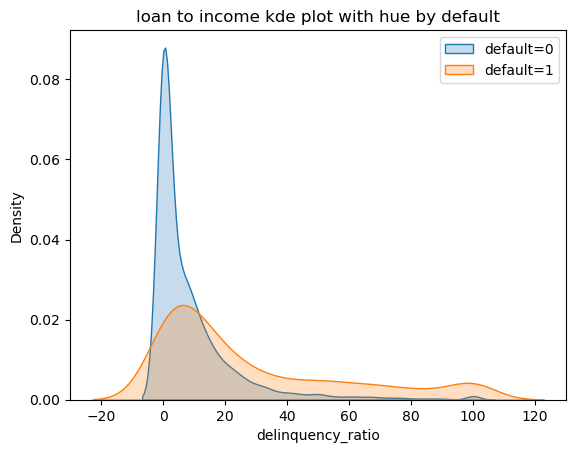

In [366]:
sns.kdeplot(df_test_1[df_test_1.default==0]["delinquency_ratio"],fill=True,label="default=0")
sns.kdeplot(df_test_1[df_test_1.default==1]["delinquency_ratio"],fill=True,label="default=1")
plt.title(f"loan to income kde plot with hue by default")
plt.legend()
plt.show()

<h4 align = "left" style="color:blue">Avg DPD per Delinquency</h4>

In [368]:
df_train_1["avg_dpd_per_delinquency"]=np.where(
    df_train_1["delinquent_months"]!=0,
    (df_train_1["total_dpd"]/df_train_1["delinquent_months"]).round(1),
0
)
df_train_1["avg_dpd_per_delinquency"].describe()

count   37493.00
mean        3.30
std         2.90
min         0.00
25%         0.00
50%         4.30
75%         5.70
max        10.00
Name: avg_dpd_per_delinquency, dtype: float64

In [369]:
df_test_1["avg_dpd_per_delinquency"]=np.where(
    df_test_1["delinquent_months"]!=0,
    (df_test_1["total_dpd"]/df_test_1["delinquent_months"]).round(1),
0
)
df_test_1["avg_dpd_per_delinquency"].describe()

count   12492.00
mean        3.29
std         2.91
min         0.00
25%         0.00
50%         4.30
75%         5.80
max        10.00
Name: avg_dpd_per_delinquency, dtype: float64

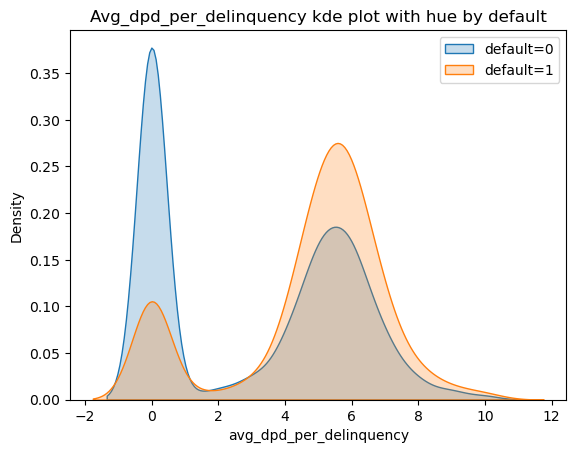

In [370]:
sns.kdeplot(df_test_1[df_test_1.default==0]["avg_dpd_per_delinquency"],fill=True,label="default=0")
sns.kdeplot(df_test_1[df_test_1.default==1]["avg_dpd_per_delinquency"],fill=True,label="default=1")
plt.title(f"Avg_dpd_per_delinquency kde plot with hue by default")
plt.legend()
plt.show()

<h4 align ="left" style="color:blue">feature selection</h4>

In [372]:
#will drop out unneccessary features

In [373]:
df_train_1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
48911,C48912,46,F,Single,Self-Employed,2755000,0,Owned,29,Kolkata,...,0,108,10,64,8,46,0,2.83,9.30,6.40
12499,C12500,28,M,Single,Salaried,547000,1,Rented,7,Hyderabad,...,1,177,0,0,4,0,0,0.89,0.00,0.00
32648,C32649,36,F,Married,Self-Employed,2123000,2,Mortgage,26,Mumbai,...,0,165,10,66,6,58,1,3.34,6.10,6.60
11636,C11637,39,F,Married,Self-Employed,193000,3,Owned,9,Hyderabad,...,2,26,6,36,6,57,0,0.75,23.10,6.00
45985,C45986,20,F,Married,Self-Employed,473000,2,Owned,24,Delhi,...,0,90,18,89,5,65,0,1.21,20.00,4.90


In [374]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [375]:
#droping columns based on technical knowledge 

In [376]:
#train
df_train_2=df_train_1.drop(["cust_id","loan_id"],axis=1)
#test
df_test_2=df_test_1.drop(["cust_id","loan_id"],axis=1)


In [377]:
#droping columns based on business knowledge 

In [378]:
df_train_3=df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test_3=df_test_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'],axis=1)

<h4 align = "left" style = "color:blue">Varinace inflation factor</h4>

In [380]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37493 entries, 48911 to 48483
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37493 non-null  int64  
 1   gender                       37493 non-null  object 
 2   marital_status               37493 non-null  object 
 3   employment_status            37493 non-null  object 
 4   number_of_dependants         37493 non-null  int64  
 5   residence_type               37493 non-null  object 
 6   years_at_current_address     37493 non-null  int64  
 7   city                         37493 non-null  object 
 8   state                        37493 non-null  object 
 9   zipcode                      37493 non-null  int64  
 10  loan_purpose                 37493 non-null  object 
 11  loan_type                    37493 non-null  object 
 12  sanction_amount              37493 non-null  int64  
 13  processing_fee   

In [381]:
df_train_3["default"]=df_train_3["default"].astype("int32")
df_test_3["default"]=df_test_3["default"].astype("int32")

In [382]:
df_train_3.select_dtypes(["int64","float64"]).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [383]:
X_train=df_train_3.drop("default",axis=1)
y_train=df_train_3["default"]

#lets not get confused here, we are doing it on the train dataset so mentioned x_train(initially we splitted train and test dataset

In [384]:
#before going to the step vif,we need to do scaling 

In [385]:
from sklearn.preprocessing import MinMaxScaler


cols_to_scale=df_train_3.select_dtypes(["int64","float64"]).columns

scaler=MinMaxScaler()
X_train[cols_to_scale]=scaler.fit_transform(X_train[cols_to_scale])
X_train.head(3)

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
48911,0.54,F,Single,Self-Employed,0.00,Owned,0.93,Kolkata,West Bengal,1.00,...,0.53,0.31,0.10,0.67,0.00,0.88,0.46,0.59,0.09,0.64
12499,0.19,M,Single,Salaried,0.20,Rented,0.20,Hyderabad,Telangana,0.66,...,0.08,0.05,0.03,1.00,0.50,0.38,0.00,0.14,0.00,0.00
32648,0.35,F,Married,Self-Employed,0.40,Mortgage,0.83,Mumbai,Maharashtra,0.49,...,0.49,0.24,0.08,1.00,0.00,0.62,0.59,0.71,0.06,0.66


In [386]:
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37493.00,37493.00,37493.00,37493.00,37493.00,37493.00,37493.00,37493.00,37493.00,37493.00,37493.00,37493.00,37493.00,37493.00,37493.00,37493.00,37493.00,37493.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.24,0.25,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [486]:
#test dataset > same method on test data

X_test=df_test_3.drop("default",axis=1)
y_test=df_test_3["default"]


cols_to_scale=df_test_3.select_dtypes(["int64","float64"]).columns

X_test[cols_to_scale]=scaler.fit_transform(X_test[cols_to_scale])
X_test.head(3)

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
18991,0.73,M,Married,Self-Employed,0.40,Owned,0.00,Jaipur,Rajasthan,0.33,...,0.40,0.15,0.05,0.33,1.00,0.38,0.27,0.44,0.00,0.00
41632,0.42,M,Single,Salaried,0.00,Rented,0.07,Jaipur,Rajasthan,0.33,...,0.32,0.05,0.01,0.33,1.00,0.38,0.38,0.07,0.15,0.49
36306,0.42,M,Married,Self-Employed,0.80,Mortgage,0.90,Delhi,Delhi,0.00,...,0.53,0.22,0.09,0.67,1.00,0.50,0.83,0.59,0.01,0.95


In [488]:
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12492.00,12492.00,12492.00,12492.00,12492.00,12492.00,12492.00,12492.00,12492.00,12492.00,12492.00,12492.00,12492.00,12492.00,12492.00,12492.00,12492.00,12492.00
mean,0.42,0.38,0.50,0.52,0.09,0.09,0.09,0.09,0.37,0.26,0.13,0.50,0.50,0.50,0.43,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.13,0.13,0.13,0.13,0.23,0.24,0.14,0.37,0.41,0.25,0.30,0.23,0.18,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.04,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.34,0.19,0.09,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.17,1.00,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [490]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df["columns"]=data.columns
    vif_df["VIF"]=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df
    

In [494]:
calculate_vif(X_train[cols_to_scale])

#vif will not work on categorical variables 

,columns,VIF
0,age,5.70
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.79
4,sanction_amount,101.99
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.10
9,principal_outstanding,16.24


In [498]:
features_to_drop_vif=["sanction_amount","processing_fee","principal_outstanding","gst","net_disbursement"]


In [500]:
x_train_1=X_train.drop(features_to_drop_vif,axis=1)
x_train_1

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_type,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
48911,0.54,F,Single,Self-Employed,0.00,Owned,0.93,Kolkata,West Bengal,1.00,...,Secured,0.53,0.10,0.67,0.00,0.88,0.46,0.59,0.09,0.64
12499,0.19,M,Single,Salaried,0.20,Rented,0.20,Hyderabad,Telangana,0.66,...,Unsecured,0.08,0.03,1.00,0.50,0.38,0.00,0.14,0.00,0.00
32648,0.35,F,Married,Self-Employed,0.40,Mortgage,0.83,Mumbai,Maharashtra,0.49,...,Secured,0.49,0.08,1.00,0.00,0.62,0.59,0.71,0.06,0.66
11636,0.40,F,Married,Self-Employed,0.60,Owned,0.27,Hyderabad,Telangana,0.66,...,Unsecured,0.06,0.00,0.67,1.00,0.62,0.58,0.11,0.23,0.60
45985,0.04,F,Married,Self-Employed,0.40,Owned,0.77,Delhi,Delhi,0.00,...,Secured,0.40,0.03,0.67,0.00,0.50,0.66,0.21,0.20,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23452,0.38,F,Married,Self-Employed,0.60,Owned,0.47,Lucknow,Uttar Pradesh,0.20,...,Secured,0.62,0.15,0.33,1.00,0.25,0.14,0.67,0.00,0.00
23775,0.62,F,Single,Self-Employed,0.00,Owned,0.83,Kolkata,West Bengal,1.00,...,Unsecured,0.02,0.18,0.00,0.50,0.12,0.22,0.11,0.00,0.00
37135,0.31,F,Married,Salaried,0.60,Owned,0.97,Delhi,Delhi,0.00,...,Secured,0.62,0.01,1.00,0.50,1.00,0.36,0.79,0.14,0.58
27098,0.00,F,Single,Salaried,0.20,Owned,0.50,Bangalore,Karnataka,0.76,...,Secured,0.47,0.04,0.67,1.00,0.50,0.03,0.58,0.00,0.00


In [508]:
vif_df=calculate_vif(x_train_1[x_train_1.select_dtypes(["int64","float64"]).columns])
vif_df

,columns,VIF
0,age,5.44
1,number_of_dependants,2.73
2,years_at_current_address,3.40
3,zipcode,3.77
4,loan_tenure_months,5.94
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.33
7,number_of_closed_accounts,2.37
8,enquiry_count,6.37
9,credit_utilization_ratio,2.92


array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

In [516]:
selected_numeric_features_vif=vif_df["columns"].values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

In [520]:
numeric_columns=x_train_1.select_dtypes(["int64","float64"]).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

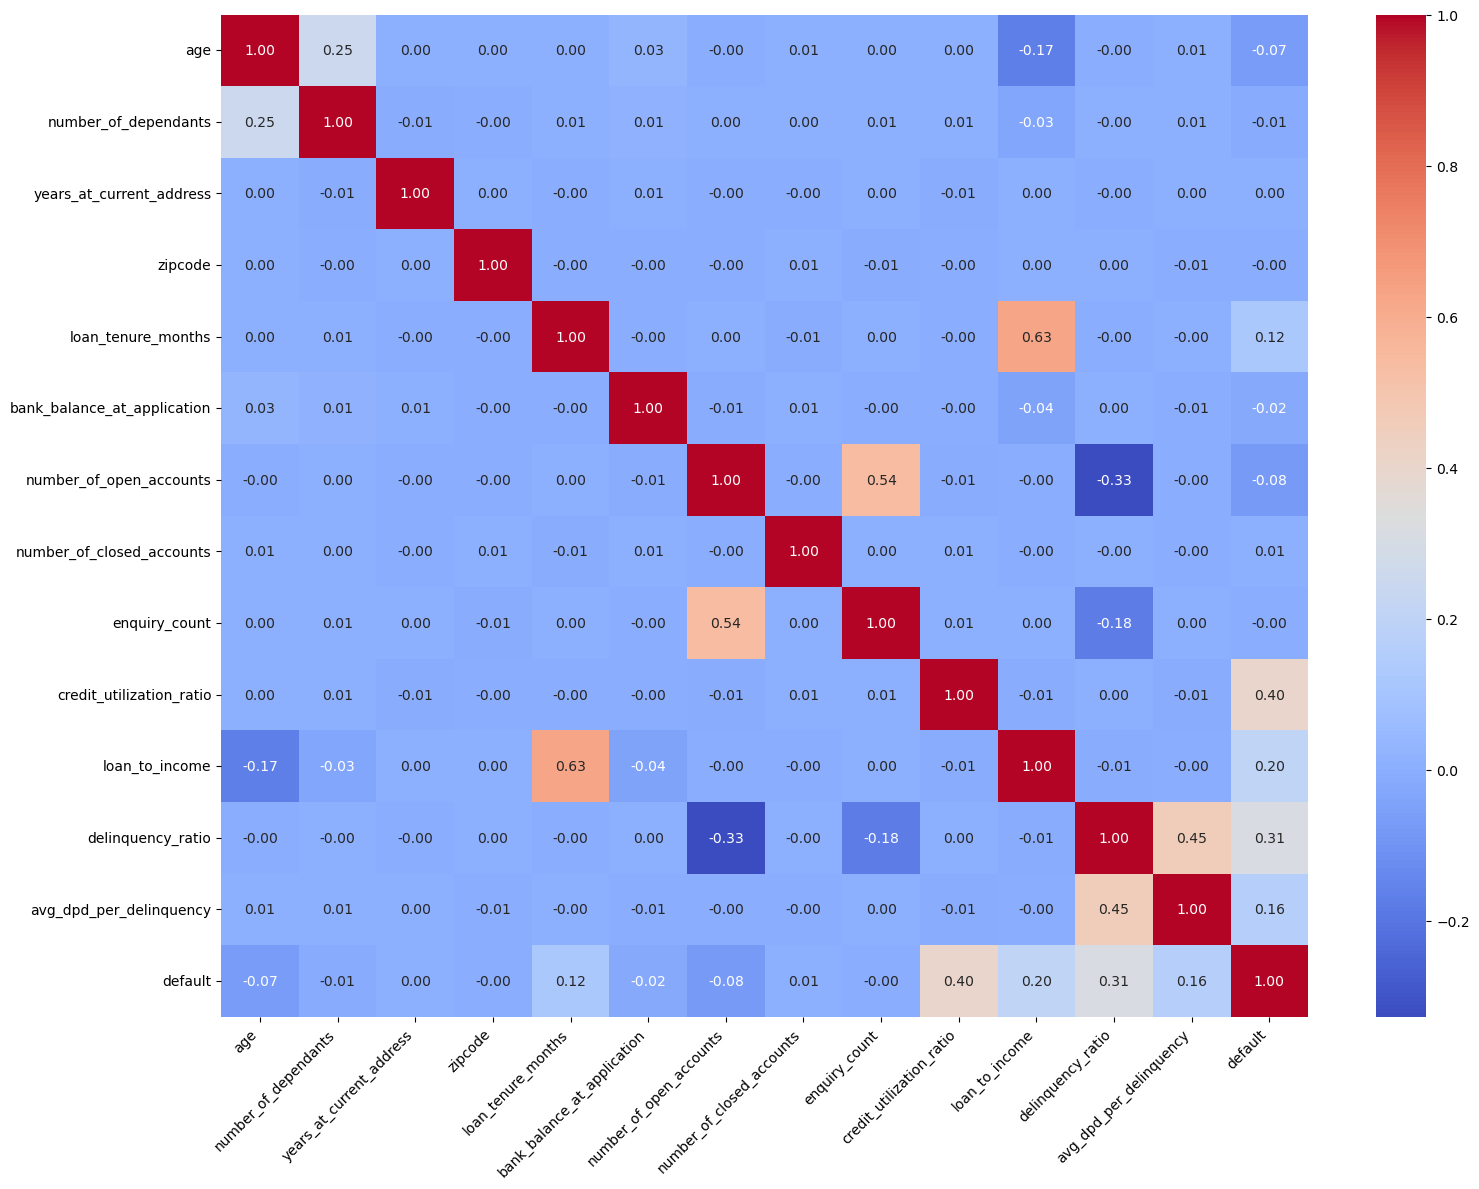

In [528]:
plt.figure(figsize=(16,12))

correlation = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
correlation

sns.heatmap(correlation,annot=True,fmt=".2f",cmap="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [557]:
columns_categorical
#there might be some way where categorical columns influence the target variable

#methods to calculate the above procedure are 1. weight of evidence(woe) and 2 information value(iv)(statistical techniques)

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type',
 'default']

In [565]:
temp=pd.concat([x_train_1,y_train],axis=1)
temp.groupby("loan_purpose")["default"].agg(["count","sum"])


,count,sum
loan_purpose,,
Auto,7417,320
Education,5711,545
Home,11284,1765
Personal,13081,605


In [585]:
def calculate_woe_iv(df,feature,target):
    grouped=df.groupby(feature)[target].agg(["count","sum"])
    grouped=grouped.rename(columns={"count":"total","sum":"good"})
    grouped["bad"]=grouped["total"]- grouped["good"]

    grouped["good_pct"]=grouped["good"]/(grouped["good"].sum())
    grouped["bad_pct"]=grouped["bad"]/(grouped["bad"].sum())

    grouped["woe"]=np.log(grouped["good_pct"]/grouped["bad_pct"])
    grouped["iv"]=(grouped["good_pct"]-grouped["bad_pct"])*grouped["woe"]

    grouped["woe"]=grouped["woe"].replace([np.inf,-np.inf],0)
    grouped["iv"]=grouped["iv"].replace([np.inf,-np.inf],0)

    total=grouped["iv"].sum()
    return grouped,total

In [587]:
calculate_woe_iv(pd.concat([x_train_1,y_train],axis=1),"loan_purpose","default")

(              total  good    bad  good_pct  bad_pct   woe   iv
 loan_purpose                                                  
 Auto           7417   320   7097      0.10     0.21 -0.74 0.08
 Education      5711   545   5166      0.17     0.15  0.11 0.00
 Home          11284  1765   9519      0.55     0.28  0.67 0.18
 Personal      13081   605  12476      0.19     0.36 -0.67 0.12,
 0.38069585645051973)

In [602]:
score_iv={}

for features in x_train_1.columns:
    if x_train_1[features].dtype=="object":
        _,iv=calculate_woe_iv(pd.concat([x_train_1,y_train],axis=1),features,"default")
        score_iv[features]=iv

    else:
        x_binned=pd.cut(x_train_1[features],bins=10,labels=False)
        _,iv=calculate_woe_iv(pd.concat([x_binned,y_train],axis=1),features,"default")
        score_iv[features]=iv
        
score_iv

{'age': 0.07789132488245762,
 'gender': 0.0005336702491105877,
 'marital_status': 0.0022124548006688476,
 'employment_status': 0.00273622812516674,
 'number_of_dependants': 0.004268267816897507,
 'residence_type': 0.2566818794134924,
 'years_at_current_address': 0.002617052318277922,
 'city': 0.0026905834157817474,
 'state': 0.002378934016457876,
 'zipcode': 0.0026737691180562457,
 'loan_purpose': 0.38069585645051973,
 'loan_type': 0.16161193789426165,
 'loan_tenure_months': 0.2215694161256816,
 'bank_balance_at_application': 0.0075805302353867164,
 'number_of_open_accounts': 0.08812479203913418,
 'number_of_closed_accounts': 0.000540642238577018,
 'enquiry_count': 0.008781791356357671,
 'credit_utilization_ratio': 2.3921159339032494,
 'loan_to_income': 0.4811366479346534,
 'delinquency_ratio': 0.7109272702418821,
 'avg_dpd_per_delinquency': 0.4101949953603374}

In [612]:

iv_df=pd.DataFrame(list(score_iv.items()),columns=["feature","iv"])
iv_df=iv_df.sort_values(by="iv",ascending=False)
iv_df

,feature,iv
17,credit_utilization_ratio,2.392
19,delinquency_ratio,0.711
18,loan_to_income,0.481
20,avg_dpd_per_delinquency,0.410
10,loan_purpose,0.381
5,residence_type,0.257
12,loan_tenure_months,0.222
11,loan_type,0.162
14,number_of_open_accounts,0.088
0,age,0.078


In [618]:
selected_features_iv=[features for features,iv in score_iv.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

In [624]:
#feature_encoding


X_train_reduced = x_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [630]:
X_train_reduced.head(2)

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
48911,0.538,Owned,Home,Secured,0.528,0.667,0.465,0.590,0.093,0.640
12499,0.192,Rented,Personal,Unsecured,0.075,1.000,0.000,0.139,0.000,0.000


In [634]:
x_train_encoded=pd.get_dummies(X_train_reduced,drop_first=True,dtype=int)
x_train_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
48911,0.538,0.528,0.667,0.465,0.590,0.093,0.640,1,0,0,1,0,0
12499,0.192,0.075,1.000,0.000,0.139,0.000,0.000,0,1,0,0,1,1


In [636]:
x_test_encoded=pd.get_dummies(X_test_reduced,drop_first=True,dtype=int)
x_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
18991,0.731,0.396,0.333,0.273,0.442,0.000,0.000,1,0,0,1,0,0
41632,0.423,0.321,0.333,0.384,0.070,0.154,0.490,0,1,0,0,1,1


<h3 align="center" style="color:blue">Model Training</h3>

<h4 align="left">Logistic Regression</h4>

In [641]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [647]:
lr=LogisticRegression()
model_lr=lr.fit(x_train_encoded,y_train)
model_lr


ypred_lr=model_lr.predict(x_test_encoded)
report_lr=classification_report(ypred_lr,y_test)
print(report_lr)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11577
           1       0.71      0.82      0.76       915

    accuracy                           0.96     12492
   macro avg       0.85      0.90      0.87     12492
weighted avg       0.97      0.96      0.96     12492



In [681]:
important_features=model_lr.coef_[0]

coef_df=pd.DataFrame(important_features,index=x_train_encoded.columns, columns=['Coefficients'])


# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)
coef_df

,Coefficients
residence_type_Owned,-1.467
loan_purpose_Home,-1.278
age,-0.515
loan_tenure_months,0.396
loan_purpose_Personal,0.629
loan_type_Unsecured,0.629
number_of_open_accounts,0.638
loan_purpose_Education,0.972
residence_type_Rented,1.443
avg_dpd_per_delinquency,2.046


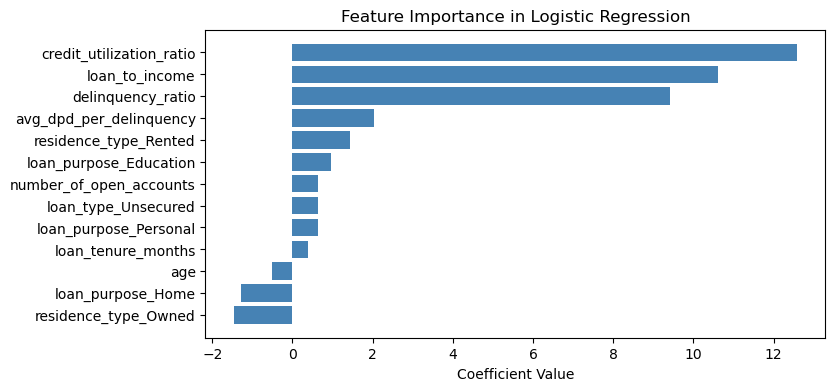

In [683]:
# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

<h4 align="left">Random Forest</h4>

In [657]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model_rfc=rfc.fit(x_train_encoded,y_train)
model_rfc


ypred_rfc=model_rfc.predict(x_test_encoded)
report_rfc=classification_report(ypred_rfc,y_test)
print(report_rfc)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11591
           1       0.70      0.82      0.75       901

    accuracy                           0.96     12492
   macro avg       0.84      0.90      0.87     12492
weighted avg       0.97      0.96      0.96     12492



<h4 align="left">XGBoosting</h4>

In [661]:
from xgboost import XGBClassifier

xgb=RandomForestClassifier()
model_xgb=xgb.fit(x_train_encoded,y_train)
model_xgb


ypred_xgb=model_xgb.predict(x_test_encoded)
report_xgb=classification_report(ypred_xgb,y_test)
print(report_xgb)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11563
           1       0.72      0.82      0.77       929

    accuracy                           0.96     12492
   macro avg       0.85      0.90      0.87     12492
weighted avg       0.97      0.96      0.96     12492



In [687]:
# randomized search cv : logistic regression 

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'lbfgs', 'C': 78.47599703514607}
Best Score: 0.7648183972452776
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11430
           1       0.81      0.72      0.76      1062

    accuracy                           0.96     12492
   macro avg       0.89      0.85      0.87     12492
weighted avg       0.96      0.96      0.96     12492



In [ ]:
#randomsied cv for xgb classifier


In [689]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(x_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7907443036777337
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11430
           1       0.75      0.83      0.79      1062

    accuracy                           0.96     12492
   macro avg       0.87      0.90      0.88     12492
weighted avg       0.96      0.96      0.96     12492



In [ ]:
#attempt -2 
# logistic regression and handle class imbalance using under sampling

In [691]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(x_train_encoded, y_train)
y_train_res.value_counts()

default
0    3235
1    3235
Name: count, dtype: int64

In [693]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(x_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11430
           1       0.50      0.96      0.66      1062

    accuracy                           0.92     12492
   macro avg       0.75      0.93      0.80     12492
weighted avg       0.95      0.92      0.93     12492



In [697]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(x_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11430
           1       0.50      0.98      0.66      1062

    accuracy                           0.91     12492
   macro avg       0.75      0.94      0.80     12492
weighted avg       0.96      0.91      0.93     12492



### Attempt 3

1. Logistic Regression
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [700]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(x_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34190
1    34190
Name: count, dtype: int64

In [702]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(x_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11430
           1       0.55      0.95      0.69      1062

    accuracy                           0.93     12492
   macro avg       0.77      0.94      0.83     12492
weighted avg       0.96      0.93      0.94     12492



In [706]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,f1_score

In [708]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-02-04 11:47:26,690] A new study created in memory with name: no-name-a9384dc0-06de-4f32-a0a5-b8b1ad5ae75c
[I 2025-02-04 11:47:28,089] Trial 0 finished with value: 0.9408931327913135 and parameters: {'C': 0.19153826821535058, 'solver': 'lbfgs', 'tol': 0.0009011880418674333, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9408931327913135.
[I 2025-02-04 11:47:28,700] Trial 1 finished with value: 0.944562665468967 and parameters: {'C': 8.294020510388002, 'solver': 'saga', 'tol': 0.008376292522684362, 'class_weight': None}. Best is trial 1 with value: 0.944562665468967.
[I 2025-02-04 11:47:28,805] Trial 2 finished with value: 0.8824222700393758 and parameters: {'C': 0.0008730837503600208, 'solver': 'newton-cg', 'tol': 0.02378394964972319, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.944562665468967.
[I 2025-02-04 11:47:29,389] Trial 3 finished with value: 0.9447066697752824 and parameters: {'C': 88.36574765187113, 'solver': 'liblinear', 'tol': 6.42569006989

In [712]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(x_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9447484802841987
  Params: 
    C: 5.022156886140013
    solver: newton-cg
    tol: 0.00016127288996459197
    class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11430
           1       0.55      0.95      0.69      1062

    accuracy                           0.93     12492
   macro avg       0.77      0.94      0.83     12492
weighted avg       0.96      0.93      0.94     12492



### Attempt 4

1. XGBoost
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [715]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-02-10 12:12:46,557] A new study created in memory with name: no-name-a82ae41d-8e24-4f31-a756-e35134054618
[I 2025-02-10 12:12:52,887] Trial 0 finished with value: 0.9759667524488211 and parameters: {'lambda': 0.06447500986083819, 'alpha': 0.002114103579449557, 'subsample': 0.925421462581388, 'colsample_bytree': 0.9828619907440581, 'max_depth': 9, 'eta': 0.2906017544232994, 'gamma': 0.5862634598880023, 'scale_pos_weight': 1.0141863612496471, 'min_child_weight': 4, 'max_delta_step': 1}. Best is trial 0 with value: 0.9759667524488211.
[I 2025-02-10 12:12:53,704] Trial 1 finished with value: 0.9673046593582765 and parameters: {'lambda': 0.9440482235502083, 'alpha': 0.022343098795216454, 'subsample': 0.896471340747705, 'colsample_bytree': 0.8612367184316714, 'max_depth': 8, 'eta': 0.11102730587681789, 'gamma': 6.996699011537614, 'scale_pos_weight': 2.9000007212056635, 'min_child_weight': 5, 'max_delta_step': 10}. Best is trial 0 with value: 0.9759667524488211.
[I 2025-02-10 12:12:53

In [717]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(x_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9759667524488211
  Params: 
    lambda: 0.06447500986083819
    alpha: 0.002114103579449557
    subsample: 0.925421462581388
    colsample_bytree: 0.9828619907440581
    max_depth: 9
    eta: 0.2906017544232994
    gamma: 0.5862634598880023
    scale_pos_weight: 1.0141863612496471
    min_child_weight: 4
    max_delta_step: 1
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11430
           1       0.72      0.82      0.77      1062

    accuracy                           0.96     12492
   macro avg       0.85      0.90      0.87     12492
weighted avg       0.96      0.96      0.96     12492



In [723]:
#model evaluation-using logistic

y_pred=best_model_logistic.predict(x_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11430
           1       0.55      0.95      0.69      1062

    accuracy                           0.93     12492
   macro avg       0.77      0.94      0.83     12492
weighted avg       0.96      0.93      0.94     12492



In [735]:
probabilities=best_model_logistic.predict_proba(x_test_encoded)[:,1]
probabilities

array([0.00000283, 0.0038248 , 0.92131204, ..., 0.00010113, 0.01907783,
       0.00434117])

In [737]:
from sklearn.metrics import roc_curve

fpr,tpr,threshold=roc_curve(y_test,probabilities)
fpr[:10],tpr[:10],threshold[:10]

(array([0.        , 0.        , 0.        , 0.00008749, 0.00008749,
        0.00017498, 0.00017498, 0.00026247, 0.00026247, 0.00034996]),
 array([0.        , 0.00094162, 0.17419962, 0.17419962, 0.18361582,
        0.18361582, 0.2306968 , 0.2306968 , 0.24105461, 0.24105461]),
 array([       inf, 0.99999999, 0.99921365, 0.99921063, 0.999077  ,
        0.99907376, 0.99841441, 0.99834851, 0.99812891, 0.99812499]))

In [739]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.9829800818212224

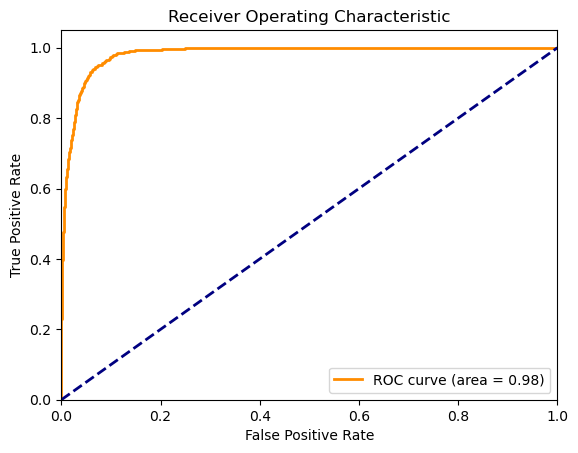

In [741]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Model Evaluation : Rankordering, KS statistic, Gini coeff

In [744]:
probabilities = best_model_logistic.predict_proba(x_test_encoded)[:,1]
probabilities

array([0.00000283, 0.0038248 , 0.92131204, ..., 0.00010113, 0.01907783,
       0.00434117])

In [748]:
df_eval= pd.DataFrame({
    "Default Truth":y_test,
    "Default Probabilities":probabilities}
                     )
df_eval.sample(10)

,Default Truth,Default Probabilities
2093,0,0.000
27880,0,0.012
12234,0,0.236
44054,0,0.000
23844,0,0.000
36894,0,0.013
40862,0,0.014
25032,1,0.948
21996,0,0.000
30364,1,0.947


In [754]:
df_eval["Decile"]=pd.qcut(df_eval["Default Probabilities"],q=10,labels=False,duplicates="drop")
df_eval.head()

,Default Truth,Default Probabilities,Decile
18991,0,0.000,1
41632,0,0.004,5
36306,1,0.921,9
26881,0,0.010,6
3469,0,0.000,3


In [758]:
df_grouped=df_eval.groupby("Decile").apply(lambda x : pd.Series({
    "Minimun Probability":x["Default Probabilities"].min(),
    "Maximun Probability":x["Default Probabilities"].max(),
    "Events":x["Default Truth"].sum(),
    "Non Events":x["Default Truth"].count()-x["Default Truth"].sum()
}))
df_grouped.reset_index(inplace=True)
df_grouped

,Decile,Minimun Probability,Maximun Probability,Events,Non Events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1249.000
2,2,0.000,0.000,0.000,1249.000
3,3,0.000,0.000,0.000,1249.000
4,4,0.000,0.001,0.000,1249.000
5,5,0.001,0.006,0.000,1249.000
6,6,0.006,0.036,3.000,1246.000
7,7,0.036,0.220,11.000,1238.000
8,8,0.220,0.820,161.000,1088.000
9,9,0.820,1.000,887.000,363.000


In [766]:
df_grouped=df_grouped.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_grouped

,Decile,Minimun Probability,Maximun Probability,Events,Non Events
0,9,0.820,1.000,887.000,363.000
1,8,0.220,0.820,161.000,1088.000
2,7,0.036,0.220,11.000,1238.000
3,6,0.006,0.036,3.000,1246.000
4,5,0.001,0.006,0.000,1249.000
5,4,0.000,0.001,0.000,1249.000
6,3,0.000,0.000,0.000,1249.000
7,2,0.000,0.000,0.000,1249.000
8,1,0.000,0.000,0.000,1249.000
9,0,0.000,0.000,0.000,1250.000


In [768]:
df_grouped['Event Rate'] = df_grouped['Events']*100 / (df_grouped['Events']+df_grouped['Non Events'])
df_grouped['Non-event Rate'] = df_grouped['Non Events']*100 / (df_grouped['Events']+df_grouped['Non Events'])
df_grouped

,Decile,Minimun Probability,Maximun Probability,Events,Non Events,Event Rate,Non-event Rate
0,9,0.820,1.000,887.000,363.000,70.960,29.040
1,8,0.220,0.820,161.000,1088.000,12.890,87.110
2,7,0.036,0.220,11.000,1238.000,0.881,99.119
3,6,0.006,0.036,3.000,1246.000,0.240,99.760
4,5,0.001,0.006,0.000,1249.000,0.000,100.000
5,4,0.000,0.001,0.000,1249.000,0.000,100.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000
8,1,0.000,0.000,0.000,1249.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [770]:
df_grouped['Cum Events'] =  df_grouped['Events'].cumsum()
df_grouped['Cum Non-events'] =  df_grouped['Non Events'].cumsum()
df_grouped

,Decile,Minimun Probability,Maximun Probability,Events,Non Events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.820,1.000,887.000,363.000,70.960,29.040,887.000,363.000
1,8,0.220,0.820,161.000,1088.000,12.890,87.110,1048.000,1451.000
2,7,0.036,0.220,11.000,1238.000,0.881,99.119,1059.000,2689.000
3,6,0.006,0.036,3.000,1246.000,0.240,99.760,1062.000,3935.000
4,5,0.001,0.006,0.000,1249.000,0.000,100.000,1062.000,5184.000
5,4,0.000,0.001,0.000,1249.000,0.000,100.000,1062.000,6433.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1062.000,7682.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1062.000,8931.000
8,1,0.000,0.000,0.000,1249.000,0.000,100.000,1062.000,10180.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1062.000,11430.000


In [772]:
df_grouped['Cum Event Rate'] = df_grouped['Cum Events'] * 100 / df_grouped['Events'].sum()
df_grouped['Cum Non-event Rate'] = df_grouped['Cum Non-events']*100 / df_grouped['Non Events'].sum()
df_grouped

,Decile,Minimun Probability,Maximun Probability,Events,Non Events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.820,1.000,887.000,363.000,70.960,29.040,887.000,363.000,83.522,3.176
1,8,0.220,0.820,161.000,1088.000,12.890,87.110,1048.000,1451.000,98.682,12.695
2,7,0.036,0.220,11.000,1238.000,0.881,99.119,1059.000,2689.000,99.718,23.526
3,6,0.006,0.036,3.000,1246.000,0.240,99.760,1062.000,3935.000,100.000,34.427
4,5,0.001,0.006,0.000,1249.000,0.000,100.000,1062.000,5184.000,100.000,45.354
5,4,0.000,0.001,0.000,1249.000,0.000,100.000,1062.000,6433.000,100.000,56.282
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1062.000,7682.000,100.000,67.209
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1062.000,8931.000,100.000,78.136
8,1,0.000,0.000,0.000,1249.000,0.000,100.000,1062.000,10180.000,100.000,89.064
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1062.000,11430.000,100.000,100.000


In [ ]:
#here we can in events column, in first three rows the values are 887,161, and 11 if we add will get the sum 1069 
#out of 1072 we already discriminated in first three deciles
# example : 98.65% cases were caught in first two deciles 

In [774]:
df_grouped['KS'] = abs(df_grouped['Cum Event Rate'] - df_grouped['Cum Non-event Rate'])
df_grouped

,Decile,Minimun Probability,Maximun Probability,Events,Non Events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.820,1.000,887.000,363.000,70.960,29.040,887.000,363.000,83.522,3.176,80.346
1,8,0.220,0.820,161.000,1088.000,12.890,87.110,1048.000,1451.000,98.682,12.695,85.987
2,7,0.036,0.220,11.000,1238.000,0.881,99.119,1059.000,2689.000,99.718,23.526,76.192
3,6,0.006,0.036,3.000,1246.000,0.240,99.760,1062.000,3935.000,100.000,34.427,65.573
4,5,0.001,0.006,0.000,1249.000,0.000,100.000,1062.000,5184.000,100.000,45.354,54.646
5,4,0.000,0.001,0.000,1249.000,0.000,100.000,1062.000,6433.000,100.000,56.282,43.718
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1062.000,7682.000,100.000,67.209,32.791
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1062.000,8931.000,100.000,78.136,21.864
8,1,0.000,0.000,0.000,1249.000,0.000,100.000,1062.000,10180.000,100.000,89.064,10.936
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1062.000,11430.000,100.000,100.000,0.000


In [ ]:
#max ks values is 85.987 that is there in the first three deciles that mean the model is workinng very good


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [778]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9829800818212224
Gini Coefficient: 0.9659601636424449


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

#### Finalize The Model and Visualize Feature Importance

In [792]:
feature_importance = final_model.coef_[0]
feature_importance

array([ 0.27794243,  0.48680787,  1.03493878, 15.18933105, 17.94989939,
       13.14215375,  1.97252697, -1.81371767,  1.70480071,  0.74701197,
       -3.75542312,  1.03762319,  1.03762319])

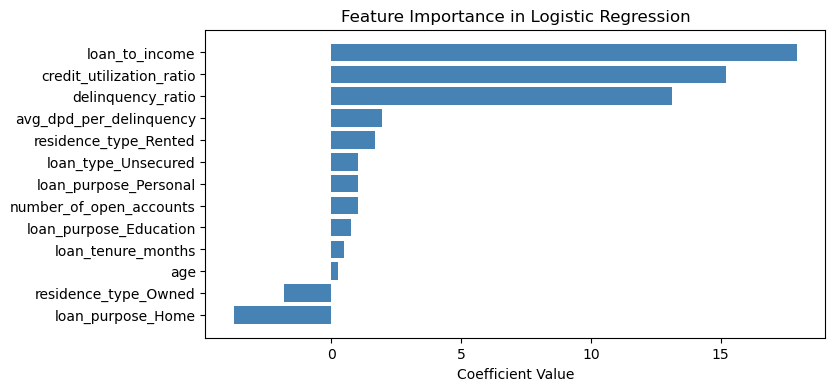

In [784]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=x_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [794]:
# save the model

In [796]:
x_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
18991,0.731,0.396,0.333,0.273,0.442,0.000,0.000,1,0,0,1,0,0
41632,0.423,0.321,0.333,0.384,0.070,0.154,0.490,0,1,0,0,1,1


In [798]:
x_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [800]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [802]:
x_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [812]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': x_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, '/Users/sangameshgoudahorapeti/Documents/machine learning/project-2/Project2_DataCollection_Resources/model_data.joblib')

['/Users/sangameshgoudahorapeti/Documents/machine learning/project-2/Project2_DataCollection_Resources/model_data.joblib']